#Universitario: Ceron Beimar Miguel
#Carrera: Ingenieria de Sistemas
#Datashet: Conjunto de datos del juego Poker	https://www.kaggle.com/datasets/hosseinah1/poker-game-dataset
# Repositorio GITHub:
# https://github.com/Beimar98/SIS420 


Información de atributos:
Variables "X":
1) S1 “Palo de la carta n.° 1”
ordinal (1-4) que representa {Corazones, Picas, Diamantes, Tréboles}

2) C1 “Rank of card #1”
Numérico (1-13) que representa (As, 2, 3, … , Queen, King)

3) S2 “Palo de la carta #2”
Ordinal (1-4) que representa {Corazones, Picas, Diamantes, Tréboles}

4) C2 “Rank of card #2”
Numérico (1-13) que representa (As, 2, 3, … , Queen, King)

5) S3 “Palo de la carta #3”
Ordinal (1-4) que representa {Corazones, Picas, Diamantes, Tréboles}

6) C3 “Rank of card #3”
Numérico (1-13) que representa (As, 2, 3, … , Queen, King)

7) S4 “Palo de la carta #4”
Ordinal (1-4) que representa {Corazones, Picas, Diamantes, Tréboles}

8) C4 “Rank of card #4”
Numérico (1-13) que representa (As, 2, 3, … , Queen, King)

9) S5 “Palo de la carta #5”
Ordinal (1-4) que representa {Corazones, Picas, Diamantes, Tréboles}

10) C5 “Rank of card 5”
Numérico (1-13) que representa (As, 2, 3, … , Queen, King)

Variables "Y":
11) CLASE “Mano de Poker”
Ordinal Tipos(0-9)
Describiendo cada tipo del cero al nueve es:
0: Nada en la mano; no es una mano de póquer reconocida
1: Un par; un par de rangos iguales dentro de cinco cartas
2: dos pares; dos pares de rangos iguales dentro de cinco cartas
3: Trío; tres rangos iguales dentro de cinco cartas
4: Escalera; cinco cartas, clasificadas secuencialmente sin espacios
5: Color; cinco cartas del mismo palo
6: Full; par + rango diferente tres de una clase
7: Cuatro de una clase; cuatro rangos iguales dentro de cinco cartas
8: Escalera de color; escalera + color o tambien valores de atributos faltantes: ninguno
9: escalera real; {As, Rey, Reina, Jota, Diez} + color


In [77]:
# se utiliza para el manejo de rutas y directorios.
import os

# Calculo cientifico y vectorial para python
import numpy as np
import pandas as pd
# Librerias para graficar
from matplotlib import pyplot

# Modulo de optimización de scipy
from scipy import optimize

# le dice a matplotlib que incruste gráficos en el cuaderno
%matplotlib inline

In [78]:
data = pd.read_csv('/content/sample_data/poker-hand-testing3.csv', header=None)
data


,0,1,2,3,4,5,6,7,8,9,10
0,1,1,1,13,2,4,2,3,1,12,0
1,3,12,3,2,3,11,4,5,2,5,1
2,1,9,4,6,1,4,3,2,3,9,1
3,1,4,3,13,2,13,2,1,3,6,1
4,3,10,2,7,1,2,2,11,4,9,0
...,...,...,...,...,...,...,...,...,...,...,...
999995,3,1,1,12,2,9,4,9,2,6,1
999996,3,3,4,5,2,7,1,4,4,3,1
999997,1,11,4,7,3,9,1,13,2,7,1
999998,3,11,1,8,1,1,3,13,2,8,1


In [79]:
data.describe()

,0,1,2,3,4,5,6,7,8,9,10
count,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000
mean,2.500493,6.997927,2.499894,7.006097,2.500871,6.998873,2.500393,7.002298,2.499451,6.989481,0.616902
std,1.117768,3.743374,1.118568,3.743481,1.118225,3.741890,1.117245,3.741270,1.118948,3.739894,0.773377
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,2.000000,4.000000,1.000000,4.000000,1.000000,4.000000,2.000000,4.000000,1.000000,4.000000,0.000000
50%,3.000000,7.000000,3.000000,7.000000,3.000000,7.000000,3.000000,7.000000,2.000000,7.000000,0.000000
75%,3.000000,10.000000,4.000000,10.000000,4.000000,10.000000,3.000000,10.000000,4.000000,10.000000,1.000000
max,4.000000,13.000000,4.000000,13.000000,4.000000,13.000000,4.000000,13.000000,4.000000,13.000000,9.000000


In [80]:
#data = data.drop([0], axis=1)
#data

In [81]:
data = np.array(data)
X = data[:, 0:10]
y = data[:, 10]
print(X)
print(y)

[[ 1  1  1 ...  3  1 12]
 [ 3 12  3 ...  5  2  5]
 [ 1  9  4 ...  2  3  9]
 ...
 [ 1 11  4 ... 13  2  7]
 [ 3 11  1 ... 13  2  8]
 [ 2  5  2 ...  3  3  3]]
[0 1 1 ... 1 1 2]


In [82]:
def  featureNormalize(X):
    X_norm = X.copy()
    mu = np.zeros(X.shape[1])
    sigma = np.zeros(X.shape[1])

    mu = np.mean(X, axis = 0)
    sigma = np.std(X, axis = 0)
    X_norm = (X - mu) / sigma
    
    return X_norm, mu, sigma

In [83]:
# llama featureNormalize con los datos cargados
X_norm, mu, sigma = featureNormalize(X)

print(X)
print('Media calculada:', mu)
print('Desviación estandar calculada:', sigma)
print(X_norm)

[[ 1  1  1 ...  3  1 12]
 [ 3 12  3 ...  5  2  5]
 [ 1  9  4 ...  2  3  9]
 ...
 [ 1 11  4 ... 13  2  7]
 [ 3 11  1 ... 13  2  8]
 [ 2  5  2 ...  3  3  3]]
Media calculada: [2.500493 6.997927 2.499894 7.006097 2.500871 6.998873 2.500393 7.002298
 2.499451 6.989481]
Desviación estandar calculada: [1.11776731 3.74337237 1.11856783 3.74347911 1.11822415 3.74188826
 1.11724476 3.74126806 1.11894759 3.73989229]
[[-1.34240194 -1.60227902 -1.34090572 ... -1.06977044 -1.34005473
   1.33974955]
 [ 0.44687924  1.33624777  0.44709493 ... -0.53519234 -0.44635782
  -0.53196211]
 [-1.34240194  0.53483138  1.34109525 ... -1.3370595   0.44733909
   0.53758741]
 ...
 [-1.34240194  1.06910898  1.34109525 ...  1.60312009 -0.44635782
   0.00281265]
 [ 0.44687924  1.06910898 -1.34090572 ...  1.60312009 -0.44635782
   0.27020003]
 [-0.44776135 -0.53372382 -0.4469054  ... -1.06977044  0.44733909
  -1.06673687]]


In [84]:
# Añade el termino de interseccion a X
# (Columna de unos para X0)
m = y.size
X = np.concatenate([np.ones((m, 1)), X_norm], axis=1)

In [85]:
print(X)

[[ 1.         -1.34240194 -1.60227902 ... -1.06977044 -1.34005473
   1.33974955]
 [ 1.          0.44687924  1.33624777 ... -0.53519234 -0.44635782
  -0.53196211]
 [ 1.         -1.34240194  0.53483138 ... -1.3370595   0.44733909
   0.53758741]
 ...
 [ 1.         -1.34240194  1.06910898 ...  1.60312009 -0.44635782
   0.00281265]
 [ 1.          0.44687924  1.06910898 ...  1.60312009 -0.44635782
   0.27020003]
 [ 1.         -0.44776135 -0.53372382 ... -1.06977044  0.44733909
  -1.06673687]]


In [86]:
#FUNCION SIGMOIDE
def sigmoid(z):
    # Calcula la sigmoide de una entrada z
    # convierte la intrada a un arreglo numpy
    z = np.array(z)
  
    g = np.zeros(z.shape)

    g = 1 / (1 + np.exp(-z))

    return g

In [87]:
# Prueba la implementacion de la funcion sigmoid
z = 0
g = sigmoid(z)

print('g(', z, ') = ', g)

g( 0 ) =  0.5


In [88]:
def calcularCosto(theta, X, y):
    # Inicializar algunos valores utiles
    m = y.size  # numero de ejemplos de entrenamiento

    J = 0
    h = sigmoid(X.dot(theta.T))
    J = (1 / m) * np.sum(-y.dot(np.log(h)) - (1 - y).dot(np.log(1 - h)))
    
    return J

In [89]:
def descensoGradiente(theta, X, y, alpha, num_iters):
    # Inicializa algunos valores
    m = y.shape[0] # numero de ejemplos de entrenamiento
    
    # realiza una copia de theta, el cual será acutalizada por el descenso por el gradiente
    theta = theta.copy()
    J_history = []
    
    for i in range(num_iters):
        h = sigmoid(X.dot(theta.T))
        theta = theta - (alpha / m) * (h - y).dot(X)
       
        J_history.append(calcularCosto(theta, X, y))
    return theta, J_history

theta calculado por el descenso por el gradiente: [ 4.76473855e-01 -1.17496835e-05  1.33212706e-02 -7.52951640e-04
  6.39734397e-03  3.70305989e-03  8.84378807e-03 -3.82588146e-03
  1.05287072e-02 -4.98858631e-03  6.03631269e-03]


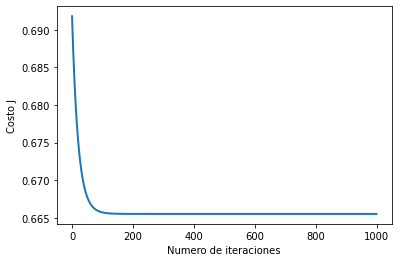

In [90]:
# Elegir algun valor para alpha (probar varias alternativas)
#alpha = 0.0001
num_iters = 1000
alpha = 0.1
#num_iters = 30
# inicializa theta y ejecuta el descenso por el gradiente
theta = np.zeros(11)
theta, J_history = descensoGradiente(theta, X, y, alpha, num_iters)

# Grafica la convergencia del costo
pyplot.plot(np.arange(len(J_history)), J_history, lw=2)
pyplot.xlabel('Numero de iteraciones')
pyplot.ylabel('Costo J')

# Muestra los resultados del descenso por el gradiente
print('theta calculado por el descenso por el gradiente: {:s}'.format(str(theta)))

#10000
X_array = [1,1,1,1,13,2,4,2,3,1,12]
tipo1 = sigmoid(np.dot(X_array, theta))   # Se debe cambiar esto

#print(f"caracteristicas: {X_array[1]} y {X_array[2]} y {X_array[3]} y {X_array[4]} y {X_array[5]} y {X_array[6]} y {X_array[7]} y {X_array[8]} y {X_array[9]} y {X_array[10]} y {X_array[11]} (usando el descenso por el gradiente):{tipo1}")

In [91]:
def costFunction(theta, X, y):
    # Inicializar algunos valores utiles
    m = y.size  # numero de ejemplos de entrenamiento

    J = 0
    grad = np.zeros(theta.shape)

    h = sigmoid(X.dot(theta.T))
    
    J = (1 / m) * np.sum(-y.dot(np.log(h)) - (1 - y).dot(np.log(1 - h)))
    grad = (1 / m) * (h - y).dot(X)
    
    return J, grad

In [92]:
# Inicializacion de parametros de ajuste
initial_theta = np.zeros(11)
print(initial_theta)
cost, grad = costFunction(initial_theta, X, y)

print('Costo en theta inicial (zeros): {:.3f}'.format(cost))
print('Costo esperado (aproximado): 0.693\n')
print(grad)
print('Gradiente en theta inicial (zeros):')
print('\t[{:.4f}, {:.4f}, {:.4f}]'.format(*grad))
print('Gradiente esperado (aproximado):\n\t[-0.1000, -12.0092, -11.2628]\n')

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
Costo en theta inicial (zeros): 0.693
Costo esperado (aproximado): 0.693

[-1.16902000e-01 -2.40365895e-05 -2.99832256e-03  1.50735953e-04
 -1.32330070e-03 -9.23498532e-04 -1.92021997e-03  8.94560015e-04
 -2.32845096e-03  1.17102965e-03 -1.23992665e-03]
Gradiente en theta inicial (zeros):
	[-0.1169, -0.0000, -0.0030]
Gradiente esperado (aproximado):
	[-0.1000, -12.0092, -11.2628]



In [93]:
# Calcula y muestra el costo y el gradiente con valores de theta diferentes a cero

test_theta = np.array([1,1,1,1,13,2,4,2,3,1,12])
#test_theta = np.array([-11.74749157, 0.09927308, 0.09316497])
print(test_theta)
cost, grad = costFunction(test_theta, X, y)

print('Costo en theta prueba: {:.12f}'.format(cost))
print('Costo esperado (aproximado): 0.218\n')

print('Gradiente en theta prueba:')
#print('\t[{:.12f}, {:.12f}, {:.12f},{:.12f}, {:.12f}, {:.12f},{:.12f}, {:.12f}, {:.12f},{:.12f}, {:.12f}, {:.12f}]'.format(*grad))
print('Gradiente esperado (aproximado):\n\t[0.043, 2.566, 2.647]')

[ 1  1  1  1 13  2  4  2  3  1 12]
Costo en theta prueba: nan
Costo esperado (aproximado): 0.218

Gradiente en theta prueba:
Gradiente esperado (aproximado):
	[0.043, 2.566, 2.647]


<ipython-input-91-1a3084f56ce3>:10: RuntimeWarning: divide by zero encountered in log
  J = (1 / m) * np.sum(-y.dot(np.log(h)) - (1 - y).dot(np.log(1 - h)))


In [94]:
# Establecer las opciones para optimize.minimize
options= {'maxiter': 1000}

# revisar la documentacion de scipy's optimize.minimize para mayor descripcion de los parametros
# La funcion devuekve un objeto `OptimizeResult`
# Se utiliza el algoritmo de Newton truncado para la optimización.
res = optimize.minimize(costFunction,
                        initial_theta,
                        (X, y),
                        jac=True,
                        method='TNC',
                        options=options)

# la propiedad fun del objeto devuelto por `OptimizeResult`
# contiene el valor del costFunction de un theta optimizado
cost = res.fun

# Theta optimizada esta en la propiedad x
theta = res.x

# Imprimir theta en la pantalla
print('Costo con un valor de theta encontrado por optimize.minimize: {:.12f}'.format(cost))
print('Costo esperado (aproximado): 0.203\n');

print('theta:')
#print('\t[{:.12f}, {:.12f}, {:.12f},{:.12f}, {:.12f}, {:.12f},{:.12f}, {:.12f}, {:.12f},{:.12f}, {:.12f}, {:.12f}]'.format(*theta))
print('Theta esperado (aproximado):\n\t[-25.161, 0.206, 0.201,0.206, 0.201,0.206, 0.201,0.206, 0.201,0.206, 0.201,0.206]')

Costo con un valor de theta encontrado por optimize.minimize: 0.665505309557
Costo esperado (aproximado): 0.203

theta:
Theta esperado (aproximado):
	[-25.161, 0.206, 0.201,0.206, 0.201,0.206, 0.201,0.206, 0.201,0.206, 0.201,0.206]


In [95]:
##
def predict(theta, X):
   
    m = X.shape[0] # Numero de ejemplo de entrenamiento

    p = np.zeros(m)

    p = np.round(sigmoid(X.dot(theta.T)))
    return p

In [98]:
#Predice la probabilidad de mano de poker de 5 cartas de 9 tipos de baraja en la mano
#Entre mayor porcentaje mayor sera la probabilidad de ganar mi mano de poker entre cero al 100% 

prob = sigmoid(np.dot([1,1,1,1,13,2,4,2,3,1,12], theta))
#El entrenamiento en Prueba sera sacar una mano de poker o ganada
print('Valor esperado: 0.775 +/- 0.002\n')

# Computacion de entrenamiento
p = predict(theta, X)
print('Precisión de entrenamiento: {:.2f} %'.format(np.mean(p == y) * 100))
print('Entre mayor porcentaje mayor sera la probabilidad de ganar mi mano de poker entre cero al 100% ')

Valor esperado: 0.775 +/- 0.002

Precisión de entrenamiento: 42.25 %
Entre mayor porcentaje mayor sera la probabilidad de ganar mi mano de poker entre cero al 100% 
